In [97]:
#dataset source 
#https://github.com/jamesqo/gun-violence-data
import pandas as pd
df = pd.read_csv('stage3.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [101]:
df['n_adults'] = df['participant_age_group'].str.count("Adult 18+")
df['n_teens'] = df['participant_age_group'].str.count("Teen")
df['n_child'] = df['participant_age_group'].str.count("Child")

In [102]:
df.drop(['participant_age_group'], axis=1, inplace=True)

In [103]:
df['n_males'] = df['participant_gender'].str.count("Male")
df['n_females'] = df['participant_gender'].str.count("Female")
df.drop(['participant_gender'], axis=1, inplace=True)

In [104]:
df['n_random_victims'] =df['participant_relationship'].str.count("Drive by - Random victims")
df['is_gang_war']=df['participant_relationship'].str.contains("Gang vs Gang")
df['is_gang_war']=df['is_gang_war'].replace({True: 1, False: 0})
df['is_SO']=df['participant_relationship'].str.contains("Significant others")
df['is_SO']=df['is_SO'].replace({True: 1, False: 0})
df['is_armed_robbery']=df['participant_relationship'].str.contains("Armed Robbery")
df['is_armed_robbery']=df['is_armed_robbery'].replace({True: 1, False: 0})
df['is_home_invasion']=df['participant_relationship'].str.contains("Home Invasion")
df['is_home_invasion']=df['is_home_invasion'].replace({True: 1, False: 0})

df.drop(['participant_relationship'], axis=1, inplace=True)

In [105]:
df['n_arrested']=df['participant_status'].str.count("Arrested")


df['n_unharmed']=df['participant_status'].str.count("Unharmed")
df.drop(['participant_status'], axis=1, inplace=True)

In [106]:
df['n_victim']=df['participant_type'].str.count("Victim")
df['n_suspect']=df['participant_type'].str.count("Subject-Suspect")
df.drop(['participant_type'], axis=1, inplace=True)

In [107]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_name', 'sources',
       'state_house_district', 'state_senate_district', 'n_adults', 'n_teens',
       'n_child', 'n_males', 'n_females', 'n_random_victims', 'is_gang_war',
       'is_SO', 'is_armed_robbery', 'is_home_invasion', 'n_arrested',
       'n_unharmed', 'n_victim', 'n_suspect'],
      dtype='object')

In [109]:
df.drop([ 'notes', 'incident_characteristics', 'incident_url_fields_missing','source_url', 'incident_url'], axis=1, inplace=True)

In [170]:
df['state'].value_counts().head()

Illinois      17556
California    16306
Florida       15029
Texas         13577
Ohio          10244
Name: state, dtype: int64

In [130]:
age_group = df.loc[:,['state', 'n_adults', 'n_teens', 'n_child']]

In [150]:
age_group.groupby(df['state']).sum().sort_values(by ='n_child', ascending=False ).head()

,n_adults,n_teens,n_child
state,,,
Texas,19829.0,1392.0,408.0
Florida,18425.0,1905.0,303.0
Georgia,11939.0,1035.0,271.0
Ohio,13006.0,1185.0,228.0
Missouri,7722.0,640.0,221.0


In [154]:
df['year']=df['date'].astype(str).str.split(pat='-',n =1, expand = True)[0]

In [166]:
age_group_state = df.groupby(['state'])[['n_adults', 'n_teens', 'n_child']].sum()

<AxesSubplot:xlabel='state'>

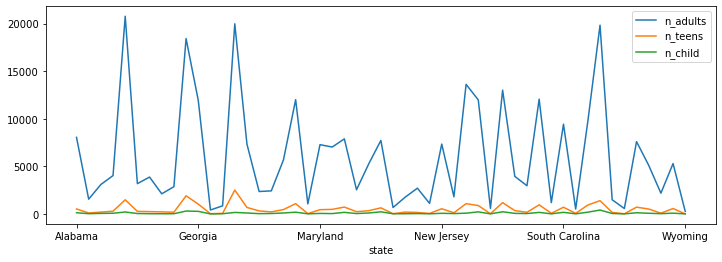

In [167]:
age_group_state.plot(figsize=(12,4))

In [168]:
age_group_year = df.groupby(['year'])[['n_adults', 'n_teens', 'n_child']].sum()

<AxesSubplot:xlabel='year'>

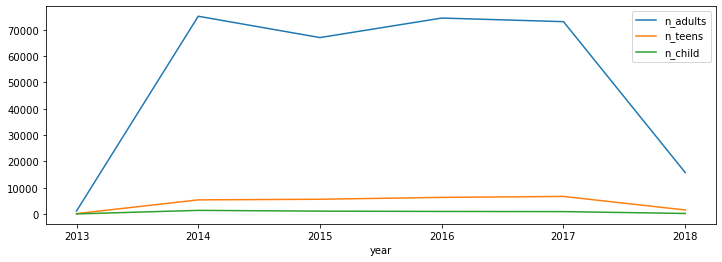

In [169]:
age_group_year.plot(figsize=(12,4))

In [171]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'latitude', 'location_description', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_name', 'sources',
       'state_house_district', 'state_senate_district', 'n_adults', 'n_teens',
       'n_child', 'n_males', 'n_females', 'n_random_victims', 'is_gang_war',
       'is_SO', 'is_armed_robbery', 'is_home_invasion', 'n_arrested',
       'n_unharmed', 'n_victim', 'n_suspect', 'year'],
      dtype='object')

<AxesSubplot:xlabel='year'>

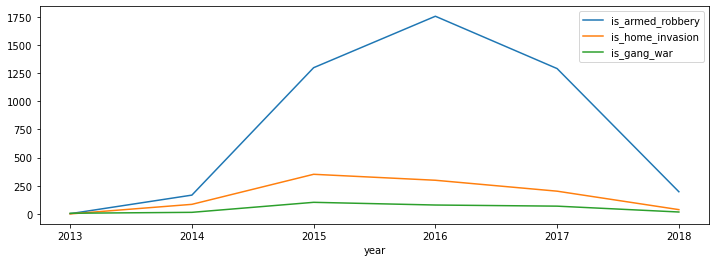

In [174]:
df.groupby(['year'])[['is_armed_robbery', 'is_home_invasion', 'is_gang_war']].sum().plot(figsize=(12,4))

<AxesSubplot:xlabel='year'>

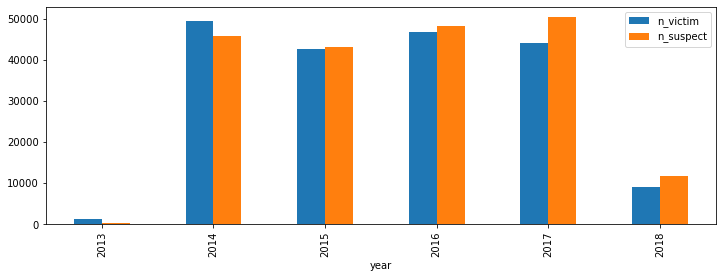

In [179]:
df.groupby(['year'])[['n_victim', 'n_suspect']].sum().plot(kind='bar',figsize=(12,4))